# Exploring Deutsch's Algorithm


## Introduction
Deutsch's Algorithm is a fundamental quantum computing algorithm. It serves as one of the first examples of a quantum algorithm that performs better than any classical counterpart. This algorithm is designed to solve a specific problem in the quantum computing domain, showcasing the power of quantum superposition and interference.


### The Problem
The problem addressed by Deutsch's Algorithm involves a function `f(x)` that takes a binary input (0 or 1) and produces a binary output (0 or 1). There are four possible functions of this type:

1. The constant function that always returns 0.
2. The constant function that always returns 1.
3. The balanced function that returns 0 for input 0 and 1 for input 1.
4. The balanced function that returns 1 for input 0 and 0 for input 1.

The challenge is to determine whether the given function `f(x)` is constant (the same output for all inputs) or balanced (different output for each input) by using the function only once. 

### Deutsch's Algorithm
Deutsch's Algorithm provides a quantum solution to this problem. It utilizes the principles of quantum superposition, entanglement, and interference to determine the nature of the function with a single query, which is impossible in the classical computing paradigm.


## What is Quantum Computing ? 

Quantum computing is a type of computing that leverages phenomena from quantum mechanics, such as superposition and entanglement, to process information. In contrast to traditional computers that use bits as the fundamental units of data (where each bit is either a 0 or a 1), quantum computers utilize quantum bits, or qubits.

<img src="./Images/bits_qbits.jpg" alt="Alternative text" width=400 height=400 />

Above is a visual comparison of a bit and a qubit. A bit can only be in one state at any given time—either 0 or 1. Meanwhile, a qubit can be in multiple states at once thanks to superposition. This capability allows quantum computers to handle a vast array of possibilities concurrently, vastly increasing their computing power.

Qubits can be entangled, which means the state of one qubit is dependent on the state of another, regardless of the distance between them. This interconnection can lead to a significant increase in computing power. For instance, when two particles like a pair of photons or electrons become entangled, they maintain a connection even when separated by vast distances. Actions performed on one particle can instantaneously influence the other, a phenomenon that seems to defy the need for signals to travel at the speed of light, as proposed by the theory of relativity.


Quantum gates are the basic building blocks of quantum circuits, much like classical logic gates are for conventional digital circuits. However, unlike classical gates, quantum gates manipulate qubits through quantum operations such as superpostition and entaglement.

**Reversibility:** Most quantum gates are reversible, which means they can be undone. This is different from many classical gates, like the AND or OR gate, which lose some input information. In quantum computing, for every unique input, there is a unique output.

**Common Gates:** Some of the basic quantum gates include:

**Pauli gates (X, Y, Z):** These are the quantum equivalent of the classical NOT gate but also include rotations of the qubit state around different axes of the Bloch sphere.

**Hadamard gate (H):** It creates a superposition state from a definite initial state, essentially putting the qubit into a state that is equally '0' and '1'.
**Controlled gates (CNOT):** These gates entangle two qubits, flipping the second qubit (target) if the first qubit (control) is in the state '1'.


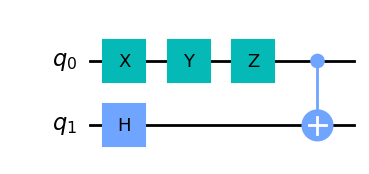

In [1]:
from qiskit import QuantumCircuit

# Define a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

#  Pauli-X gate 
qc.x(0)

# Pauli-Y gate 
qc.y(0)

# Pauli-Z gate 
qc.z(0)

#Hadamard gate
qc.h(1)

# CNOT gate 
qc.cx(0, 1)

# Visualize the circuit
qc.draw('mpl')


## Example

In [2]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Function to create a quantum circuit for Deutsch's algorithm
def deutsch_algorithm(oracle):
    # Create a 2-qubit quantum circuit
    circuit = QuantumCircuit(2, 1)

    # Apply a Hadamard gate to both qubits
    circuit.h(0)
    circuit.h(1)

    # Apply the oracle
    circuit.append(oracle, [0, 1])

    # Apply another Hadamard gate to the first qubit
    circuit.h(0)

    # Measure the first qubit
    circuit.measure(0, 0)

    return circuit

balanced_oracle = QuantumCircuit(2)
balanced_oracle.cx(0, 1)

constant_oracle = QuantumCircuit(2)

oracle = balanced_oracle

circuit = deutsch_algorithm(oracle)

# Print the circuit in ASCII art
print(circuit.draw(output='text'))


     ┌───┐┌──────────────┐┌───┐┌─┐
q_0: ┤ H ├┤0             ├┤ H ├┤M├
     ├───┤│  circuit-138 │└───┘└╥┘
q_1: ┤ H ├┤1             ├──────╫─
     └───┘└──────────────┘      ║ 
c: 1/═══════════════════════════╩═
                                0 


{'0': 1024}


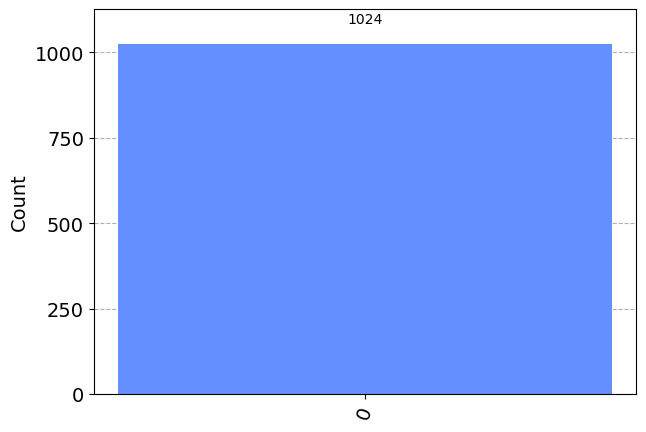

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Function to create a quantum circuit for Deutsch's algorithm
def deutsch_algorithm(oracle):
    # Create a 2-qubit quantum circuit
    circuit = QuantumCircuit(2, 1)

    # Apply a Hadamard gate to both qubits
    circuit.h(0)
    circuit.h(1)

    # Apply the oracle
    circuit.append(oracle, [0, 1])

    # Apply another Hadamard gate to the first qubit
    circuit.h(0)

    # Measure the first qubit
    circuit.measure(0, 0)

    return circuit

balanced_oracle = QuantumCircuit(2)
balanced_oracle.cx(0, 1)

oracle = balanced_oracle

circuit = deutsch_algorithm(oracle)

circuit = deutsch_algorithm(oracle)

# Use the Aer's statevector simulator
simulator = Aer.get_backend('qasm_simulator')

job = execute(circuit, simulator, shots=1024)

result = job.result()

counts = result.get_counts(circuit)

print(counts)

# Display a histogram of the results
plot_histogram(counts)


### Quantum Circuit Setup
The `deutsch_algorithm` function creates a 2-qubit quantum circuit. In Deutsch's algorithm, one qubit is used as the input to the oracle, and the other qubit is used as an ancillary qubit.

### Hadamard Gates
The circuit applies Hadamard gates to both qubits. The Hadamard gate (denoted as `H`) creates a superposition of states, meaning each qubit is in a state that is both 0 and 1 simultaneously.

### Oracle Application
The circuit then applies the oracle. The oracle is a black box that implements the function being tested (either constant or balanced). In your example, two oracles are defined: `balanced_oracle`, which uses a CNOT gate (denoted as `cx`) to create a balanced function, and `constant_oracle`, which does nothing, representing a constant function.

### Second Hadamard Gate
Another Hadamard gate is applied to the first qubit. This step is crucial as it interferes the states in a way that the measurement will reveal information about the nature of the function.

### Measurement
Finally, the first qubit is measured. The result of this measurement tells us whether the function implemented by the oracle is constant or balanced. In a classical setting, this would require multiple queries to the function, but quantum parallelism allows it to be done in a single query using Deutsch's algorithm.

### Execution on Quantum Simulator
After setting up the circuit, it is executed on a quantum simulator. This is done using Qiskit's Aer module, specifically the `'qasm_simulator'` backend, which simulates a quantum computer capable of performing measurements.

The execution is typically performed with multiple shots (e.g., 1024), which means the experiment (the entire circuit including the measurement) is repeated several times. This repetition is necessary because quantum measurements can have probabilistic outcomes.

After the execution, the results are collected, and the counts of each outcome are analyzed. These counts indicate how many times each possible measurement result was observed. This data is then used to determine whether the function implemented by the oracle is constant or balanced. A histogram of these counts can also be displayed for visual analysis.

In the case of Deutsch's algorithm, for a constant function, you would expect to see all measurements collapsing to one value (either all 0s or all 1s). For a balanced function, there would be a split in the measurement outcomes.



## Advantages and disadvatages of the problem and quantum computing

**Computational Advantages:** 

**Speed** Deutsch's Algorithm can solve the Deutsch-Jozsa problem in a single query, while the best classical algorithm requires two queries. This means that Deutsch's Algorithm can be a significant improvement in efficiency for certain problems.

**Efficiency** Quantum computers can perform computations in parallel(Two or more at the same time), while classical computers are limited to serial computations(One after another). This means that quantum computers can potentially solve problems that would take classical computers an impractical amount of time.

**Computational Disadvantages:** 

**Fault Tolerance** Quantum computing is much susceptible to errors compared to classical computers this is because quantum noise can disrupt the state of qubits. Quantum noise is essentially disrupting the smooth operation of the system.

**Scaling** Each qubit added to the system increases its complexity which can become difficult to manage and it can increase the fragility of the system



## Expanded Explanation of the Problem

A key aspect of the problem to understand is that it is an abstract problem, in other words it is specifically  for the purpose to demonstrate the unique capabilities of quantum computers and does not solve any real world problems.

**Quantum Superposition and Interference:** It showcases how quantum superposition and interference can be harnessed to solve a problem in a way that is fundamentally different from classical computing approaches.

**Quantum Computing Principles:** The algorithm is a simple  demonstration of the principles of quantum computing. It helps in understanding how quantum states can be manipulated and observed to obtain information that would be less accessible through classical means.

**Educational Tool:** In educational contexts, Deutsch's Algorithm is often used to introduce students and researchers to quantum computing. It's an entry point for understanding more complex quantum algorithms.

**Basis for Advanced Algorithms:** While the problem Deutsch's Algorithm solves is abstract, the principles it demonstrates are foundational for more complex and practical quantum algorithms, such as Grover's algorithm for database searching and Shor's algorithm for integer factorization, which have more direct applications.

Refrences:
https://scienceexchange.caltech.edu/topics/quantum-science-explained/entanglement

https://scienceexchange.caltech.edu/topics/quantum-science-explained/quantum-superposition

https://qiskit.org/ecosystem/aer/index.html

https://jan-czechowski.medium.com/implementing-deutschs-algorithm-in-qiskit-and-cirq-48949d60e59d